# NAME: ABINSINGUZA MORISON K
# REG NUMBER: 24/U/02594/PS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [ ]:

import pandas as pd

file_path = "C:\\Users\\Unusual_101\\Desktop\\cfc\\MoMTSim_20240722202413_1000_dataset.csv"
df = pd.read_csv(file_path)

# Check the first few rows of the DataFrame
df.head()


,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,0,PAYMENT,579.16,4018807983755588,29.32,29.32,30-0000345,0.00,0.00,0
1,0,TRANSFER,39.03,4610593854752035,39.03,0.00,4944921135715488,55.94,94.98,1
2,0,TRANSFER,21.78,4840578447365454,21.78,0.00,4305579785620656,58.09,79.88,1
3,0,PAYMENT,570.22,4958066799829630,5.29,5.29,00-0000388,0.00,0.00,0
4,0,PAYMENT,574.80,4149196095918843,82.63,82.63,80-0005320,0.00,0.00,0


In [ ]:
# Getting  basic info and summary statistics
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225958 entries, 0 to 4225957
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   transactionType  object 
 2   amount           float64
 3   initiator        int64  
 4   oldBalInitiator  float64
 5   newBalInitiator  float64
 6   recipient        object 
 7   oldBalRecipient  float64
 8   newBalRecipient  float64
 9   isFraud          int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 322.4+ MB


,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
count,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06
mean,9.811771e+01,5.302139e+04,4.495008e+15,2.246055e+07,2.246527e+07,1.685005e+06,1.703967e+06,5.284288e-01
std,5.573710e+01,2.708194e+06,2.912521e+14,6.418504e+07,6.421561e+07,6.795783e+06,6.802160e+06,4.991912e-01
min,0.000000e+00,0.000000e+00,4.000000e+15,-1.999926e+05,-1.999926e+05,-7.477966e+04,0.000000e+00,0.000000e+00
25%,5.000000e+01,9.444000e+01,4.237994e+15,4.681000e+01,0.000000e+00,3.345156e+04,4.251237e+04,0.000000e+00
50%,9.900000e+01,5.966900e+02,4.491576e+15,3.655435e+03,0.000000e+00,2.007614e+05,2.042479e+05,1.000000e+00
75%,1.470000e+02,1.708469e+04,4.747260e+15,2.344082e+05,8.150306e+04,2.002134e+06,2.041814e+06,1.000000e+00
max,1.920000e+02,7.654805e+08,5.000000e+15,6.409231e+08,6.409231e+08,3.810134e+08,3.813883e+08,1.000000e+00


In [ ]:
# Computing mean and standard deviation for the 'amount' column
mean_amount = df['amount'].mean()
std_amount = df['amount'].std()

print("Mean of amount:", mean_amount)
print("Standard Deviation of amount:", std_amount)


Mean of amount: 53021.392248285476
Standard Deviation of amount: 2708193.6453555515


I computed the mean and standard deviation of the amount column to understand the central tendency and the variability of transaction amounts.

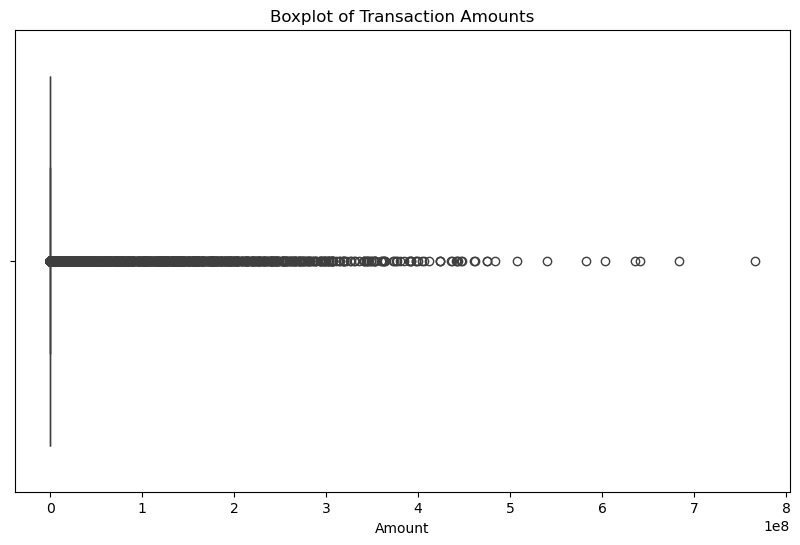

In [ ]:
# Creating and displaying a boxplot for the 'amount' column using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amount'])
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()


The boxplot visually represents the distribution of transaction amounts and helps identify potential outliers.

In [ ]:
# Calculating the first (Q1) and third (Q3) quartiles
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing the outliers
outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])


Number of outliers: 370472


I used the IQR(Inter Quartile Range) method to identify outliers. Data points that fall below the lower bound or above the upper bound are considered outliers. This could indicate either data entry errors or genuine, extreme transactions that need further analysis.

In [ ]:
# Calculating the overall fraud probability in the dataset
overall_fraud_rate = df['isFraud'].mean()  # The mean gives the proportion of fraud cases
print("Overall Fraud Probability:", overall_fraud_rate)


Overall Fraud Probability: 0.5284288201633807


The overall fraud probability is the fraction of transactions marked as fraud, computed as the average of the isFraud column.

In [ ]:
# Check unique transaction types
print(df['transactionType'].unique())


['PAYMENT' 'TRANSFER' 'DEPOSIT' 'WITHDRAWAL' 'DEBIT']


In [ ]:
# Choosing the transaction type to analyze 
transaction_type = 'TRANSFER'  
subset = df[df['transactionType'] == transaction_type]

# Calculating the fraud probability for the chosen transaction type
fraud_rate_given_type = subset['isFraud'].mean()
print(f"Fraud Probability for transaction type '{transaction_type}':", fraud_rate_given_type)


Fraud Probability for transaction type 'TRANSFER': 0.8893529015148468


I filtered the dataset for a TRANSFER transactionType and computed the fraud probability for that subset. This conditional probability can then be compared with the overall fraud rate to identify any notable differences.

## Summary of Findings

- **Distribution of Transaction Amounts:**  
  The mean transaction amount is **[53021.392248285476]** with a standard deviation of **[2708193.6453555515]**. The boxplot revealed the presence of several outliers, suggesting the possibility of extreme transactions which could be genuine or may need further data validation.

- **Fraud Analysis:**  
  The overall fraud probability is **[ 0.5284288201633807]**. For transactions of type `'TRANSFER'`, the fraud probability is **[ 0.8893529015148468]**, which is [higher] than the overall rate. This difference provides insights into potential risk factors associated with specific transaction types.

- **Implications:**  
  Such findings highlight areas that may require additional attention — for instance, the high variability in transaction amounts and the potentially elevated fraud risk in certain transaction types could impact risk management strategies.
